# Heart Disease
Perform data cleaning, outlier detection, feature engineering, and visualization to understand which features influence heart disease.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()

df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
#Basic information
print("Shape:",df.shape)
#data info
print(df.info)
#summarie of data
print(df.describe())

Shape: (920, 16)
<bound method DataFrame.info of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     12

#### Analysis Missing value

In [6]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df)) *100

})
missing.sort_values(by='missing_percent',ascending=False)




,missing_count,missing_percent
ca,611,66.413043
thal,486,52.826087
slope,309,33.586957
fbs,90,9.782609
oldpeak,62,6.739130
trestbps,59,6.413043
exang,55,5.978261
thalch,55,5.978261
chol,30,3.260870
restecg,2,0.217391


### Handle Missing Value

In [7]:
#drop ca ,thal
df.drop(columns=['ca', 'thal'], inplace=True)
#Filling missing values -categorical
cat_cols = ['slope', 'restecg', 'exang', 'cp', 'dataset']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# filliing missing values-numeric
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'fbs']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

#verify
df.isnull().sum()


C:\Users\Bhavani\AppData\Local\Temp\ipykernel_26308\1910380056.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Bhavani\AppData\Local\Temp\ipykernel_26308\1910380056.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], 

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [ ]:
# Check total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
# remove duplicates
df.drop_duplicates(inplace=True)



Number of duplicate rows: 0
id             int64
age            int64
sex         category
dataset     category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalch       float64
exang       category
oldpeak      float64
slope       category
num            int64
dtype: object


### Analysis

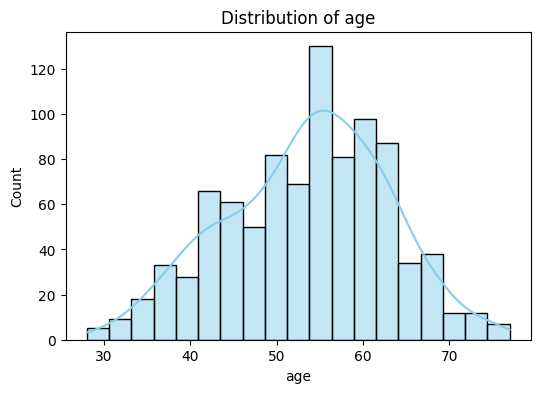

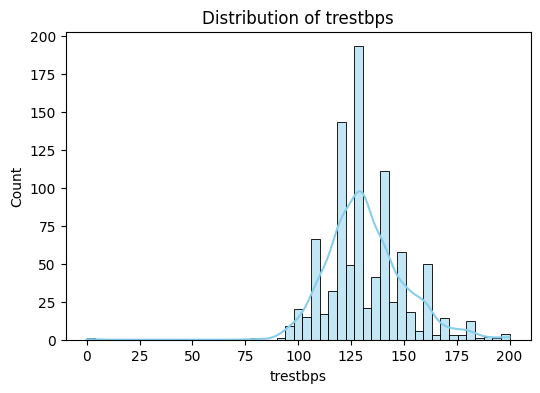

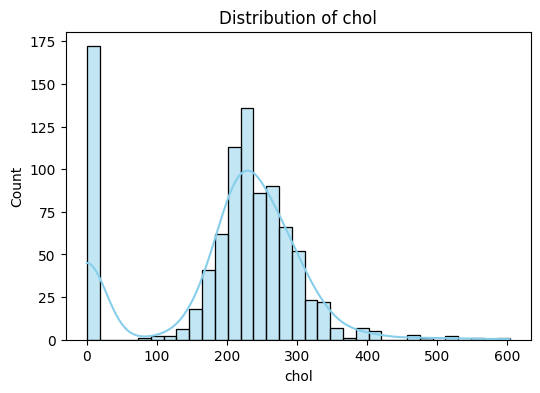

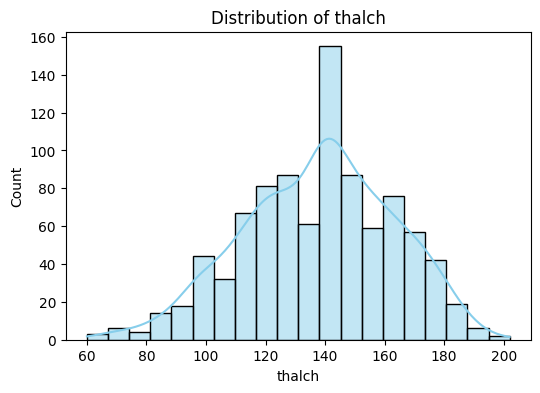

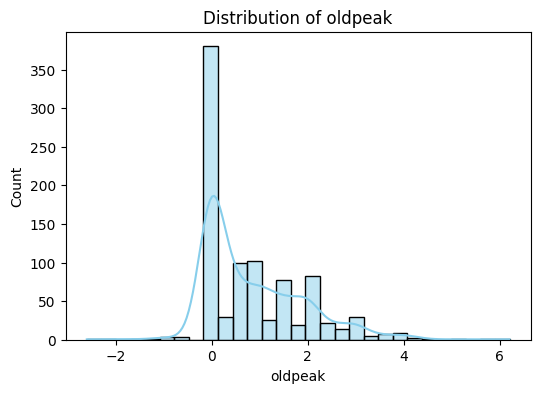

In [12]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
# univariate
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()



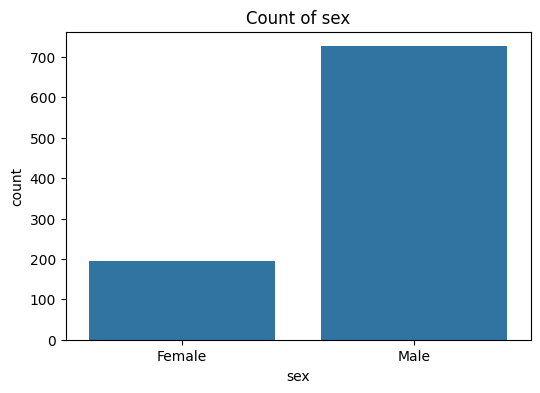

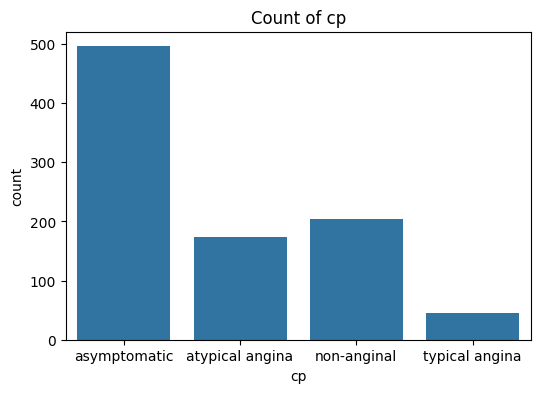

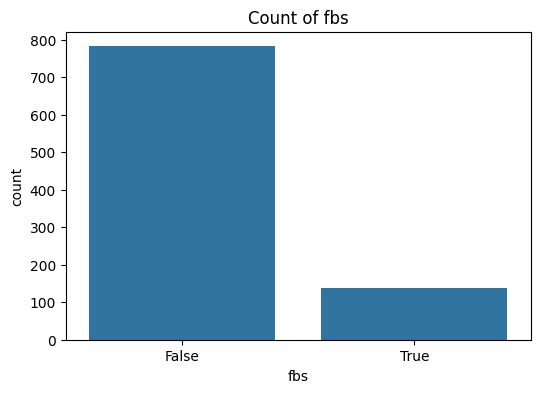

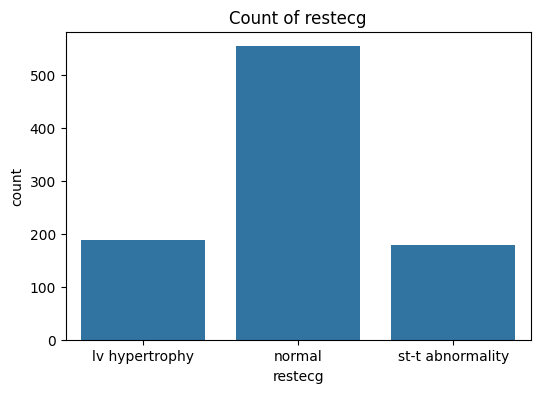

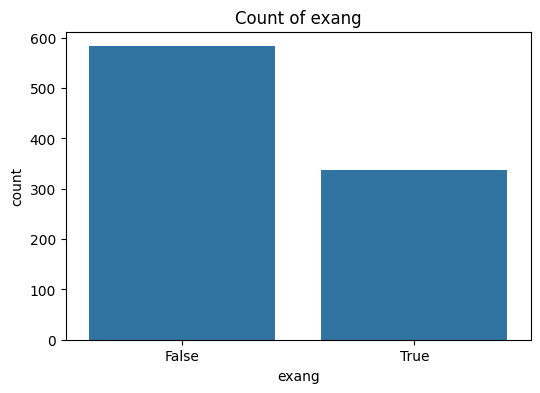

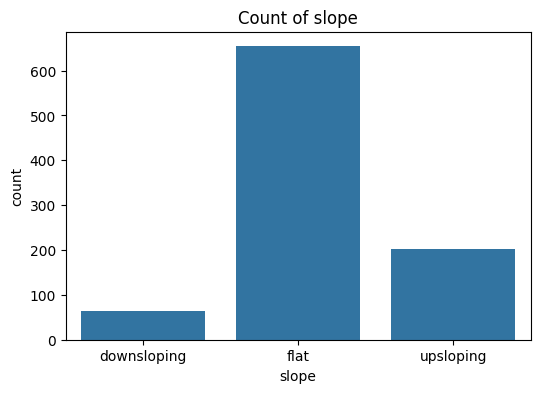

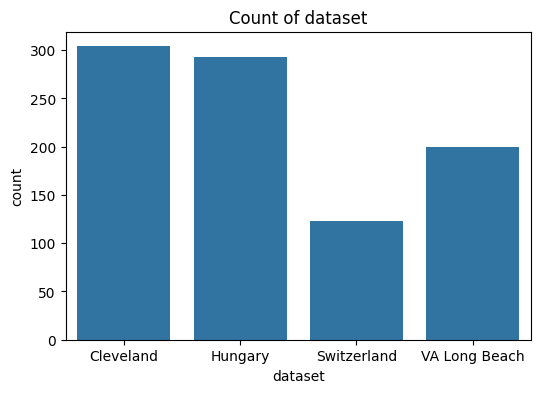

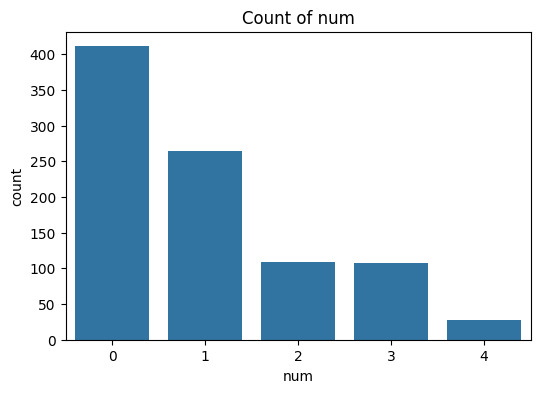

In [16]:
#univariate -categorical
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'dataset', 'num']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col],data=df)
    plt.title(f"Count of {col}")
    plt.show()


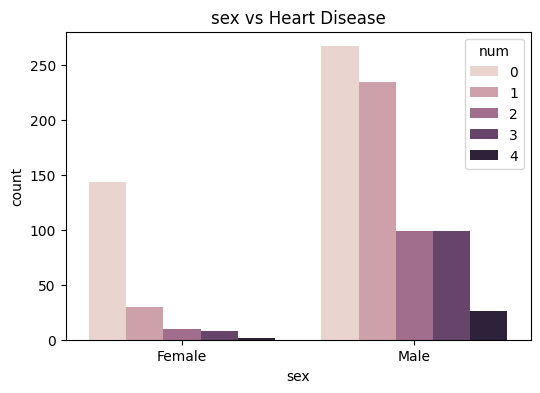

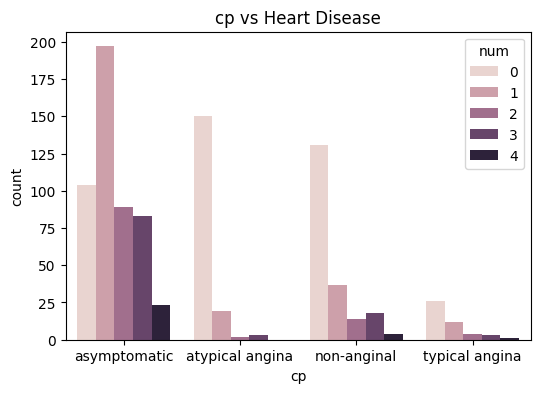

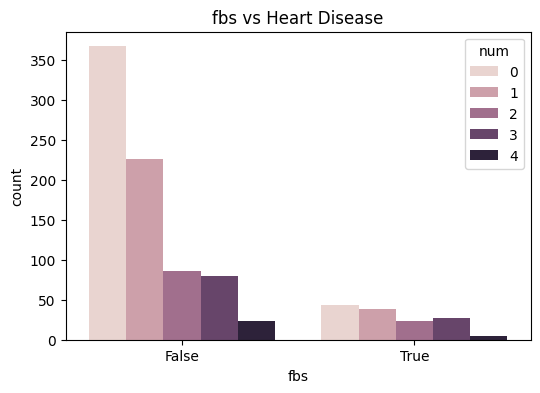

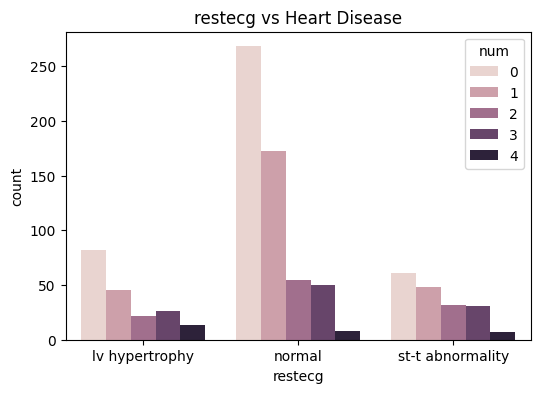

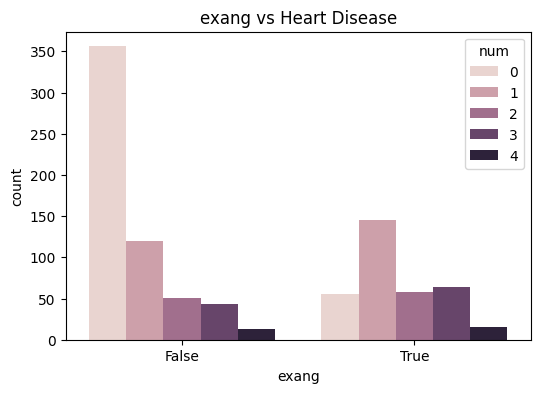

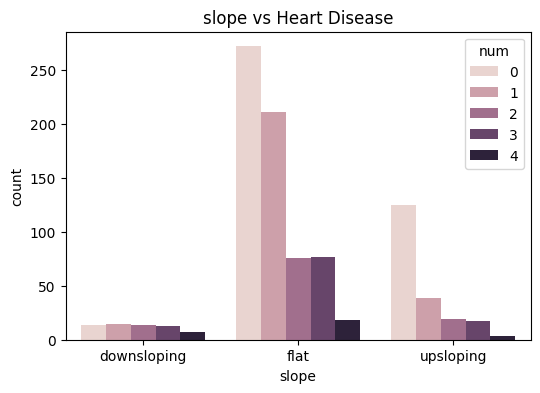

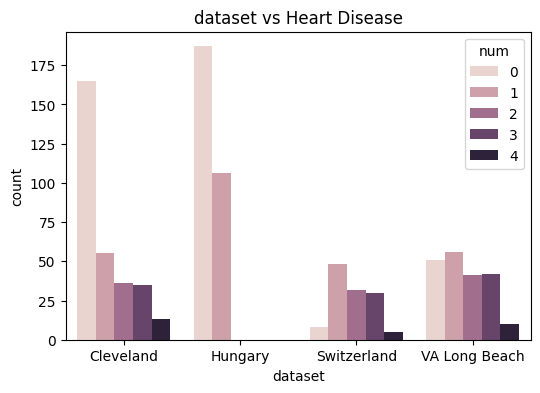

In [17]:
## Bivariate -
#categorical vs target
for col in cat_cols[:-1]:  # exclude target itself
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f"{col} vs Heart Disease")
    plt.show()


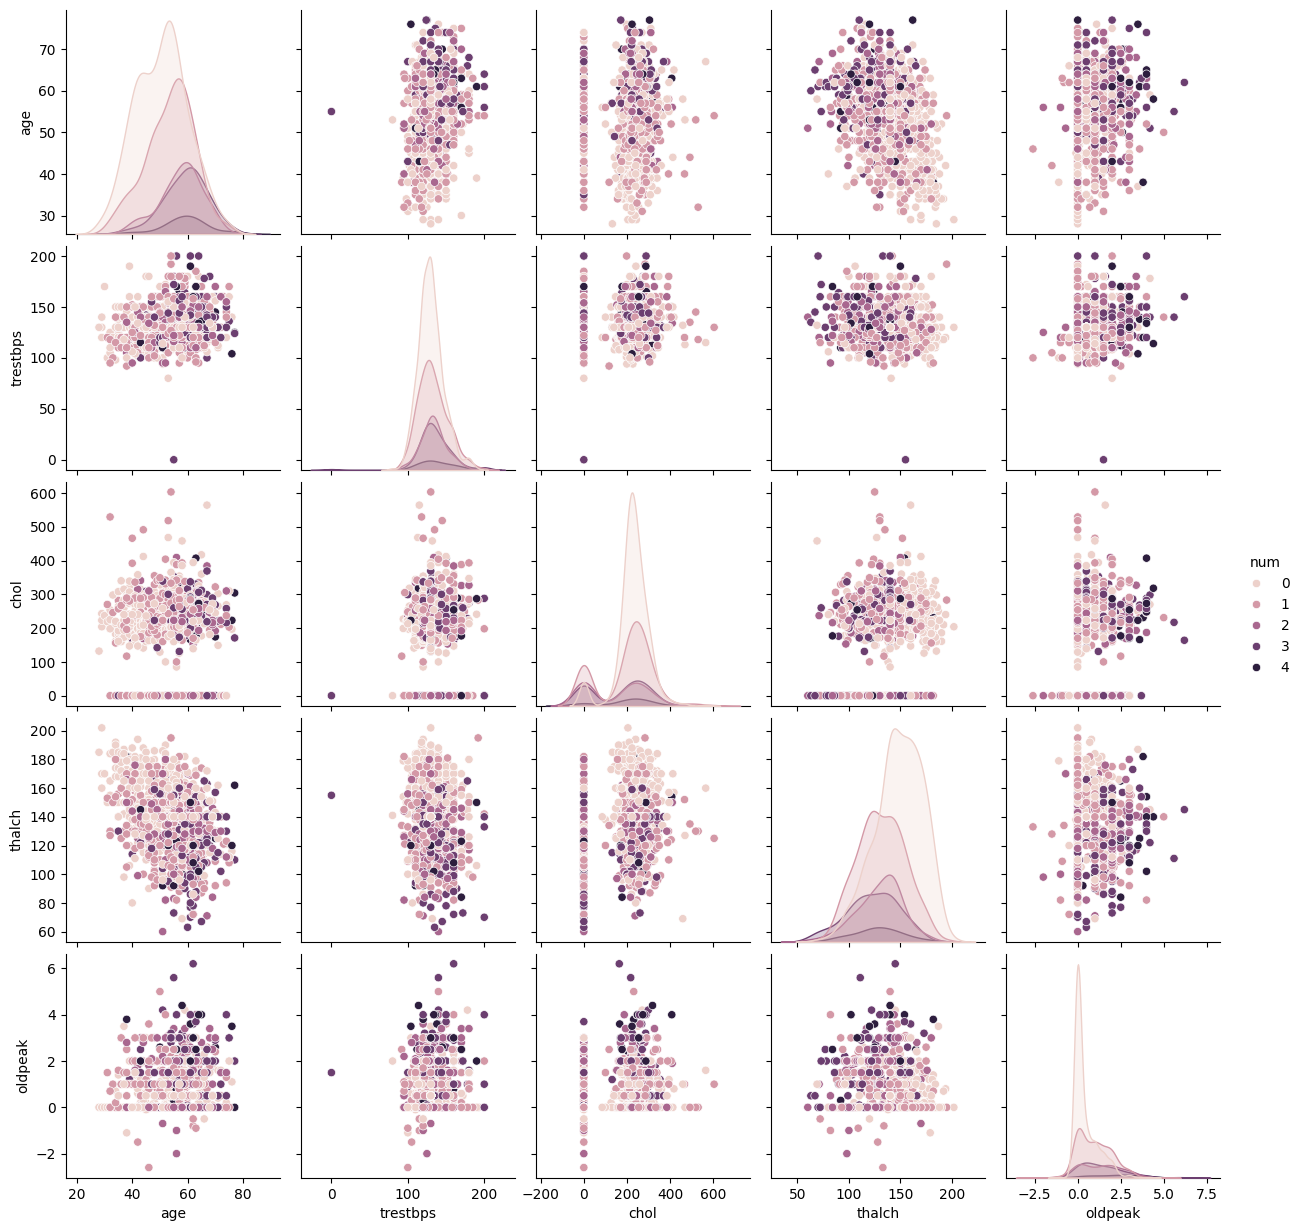

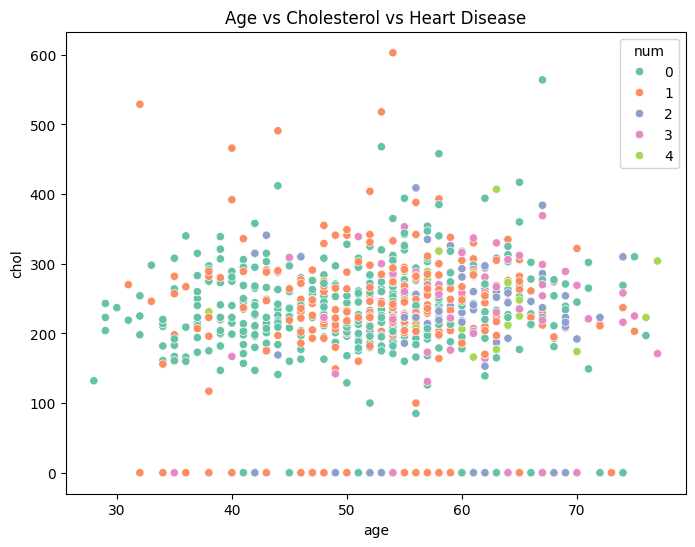

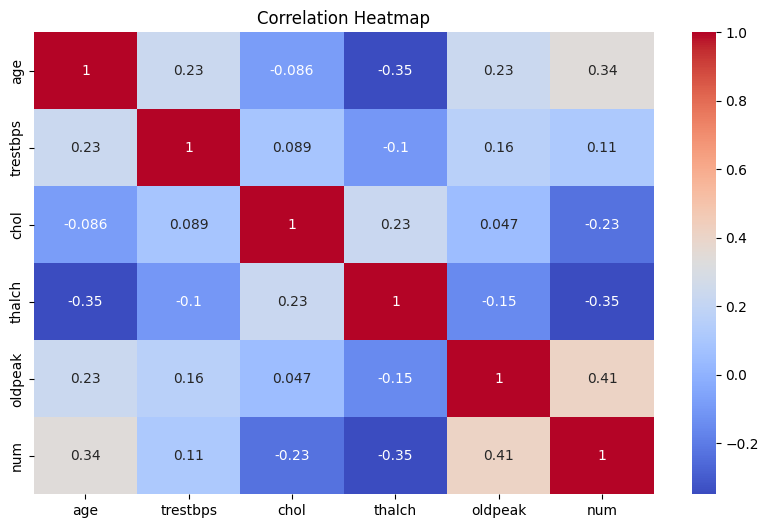

In [20]:
#Multivariate 
#pairplot
sns.pairplot(df[num_cols + ['num']], hue='num')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='chol', hue='num', data=df, palette='Set2')
plt.title("Age vs Cholesterol vs Heart Disease")
plt.show()

#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['num']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Outlier treat


Number of outliers in age: 0


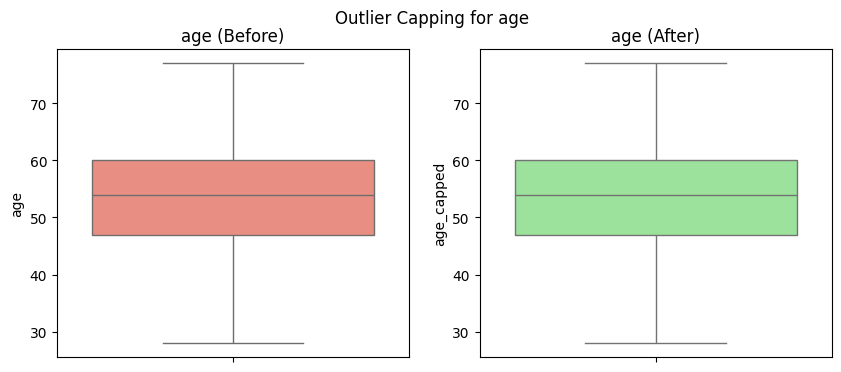

Number of outliers in trestbps: 28


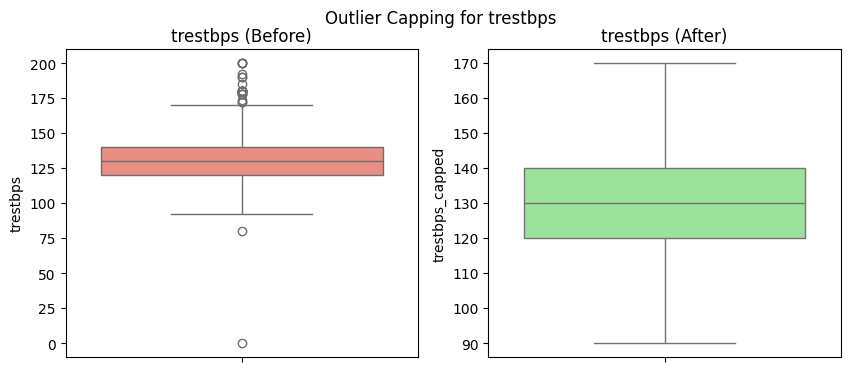

Number of outliers in chol: 185


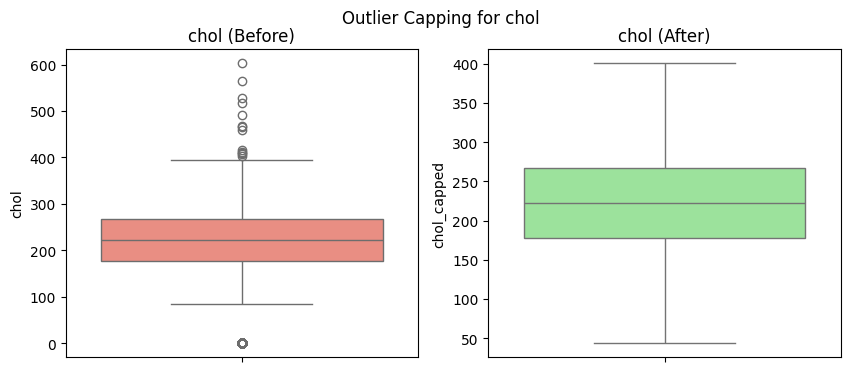

Number of outliers in thalch: 2


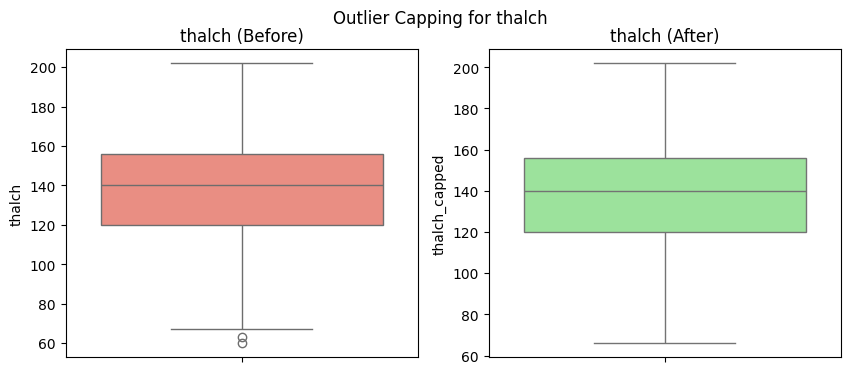

Number of outliers in oldpeak: 16


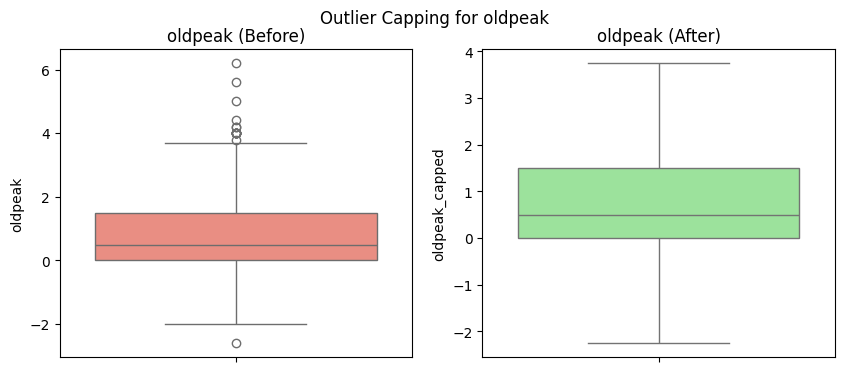

In [21]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Number of outliers in {col}: {len(outliers)}")

    # Cap the outliers
    df[f'{col}_capped'] = df[col].clip(lower, upper)

    # Visualize before/after
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.boxplot(y=df[col], ax=axes[0], color='salmon')
    axes[0].set_title(f"{col} (Before)")
    sns.boxplot(y=df[f'{col}_capped'], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"{col} (After)")
    plt.suptitle(f"Outlier Capping for {col}")
    plt.show()


### Feature Enfineering


In [25]:
# Age Group
df['age_group'] = pd.cut(df['age_capped'], bins=[20, 35, 50, 65, 80],
                         labels=['Young', 'Middle Age', 'Senior', 'Elderly'])

# Cholesterol Category
df['chol_category'] = pd.cut(df['chol_capped'], bins=[0, 200, 240, 600],
                             labels=['Normal', 'Borderline', 'High'])

# Heart Rate Level
df['thalch_level'] = pd.cut(df['thalch_capped'], bins=[70, 120, 150, 200],
                            labels=['Low', 'Moderate', 'High'])
